#### Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#### Loading the Model, x_test and y_test

In [2]:
model = joblib.load('../Models/Model.pkl')
x_test = joblib.load('../Models/x_test.pkl')
y_test = joblib.load('../Models/y_test.pkl')

#### Model Prediction

In [3]:
pred = model.predict(x_test)
pred

array(['Positive', 'Positive', 'Negative', ..., 'Negative', 'Negative',
       'Positive'], shape=(5900,), dtype=object)

#### Comparison DataFrame

In [4]:
comp = pd.DataFrame()
comp['Actual'] = y_test
comp['Predicted'] = pred

In [5]:
comp.head()

,Actual,Predicted
350,Neutral,Positive
14797,Positive,Positive
12271,Negative,Negative
28809,Positive,Negative
4706,Negative,Negative


In [6]:
comp.tail()

,Actual,Predicted
15613,Positive,Negative
19372,Negative,Negative
18375,Negative,Negative
10216,Positive,Negative
25413,Positive,Positive


#### Displaying the Accuracy Score of the Model

In [8]:
print(f'Accuracy Score of the Model : {accuracy_score(y_test,pred)}')

Accuracy Score of the Model : 0.8742372881355932


#### Displaying and Plotting the Confusion Matrix of the Model

In [10]:
cm = confusion_matrix(y_test,pred)
cm

array([[3267,    8,  217],
       [ 108,  113,   59],
       [ 337,   13, 1778]])

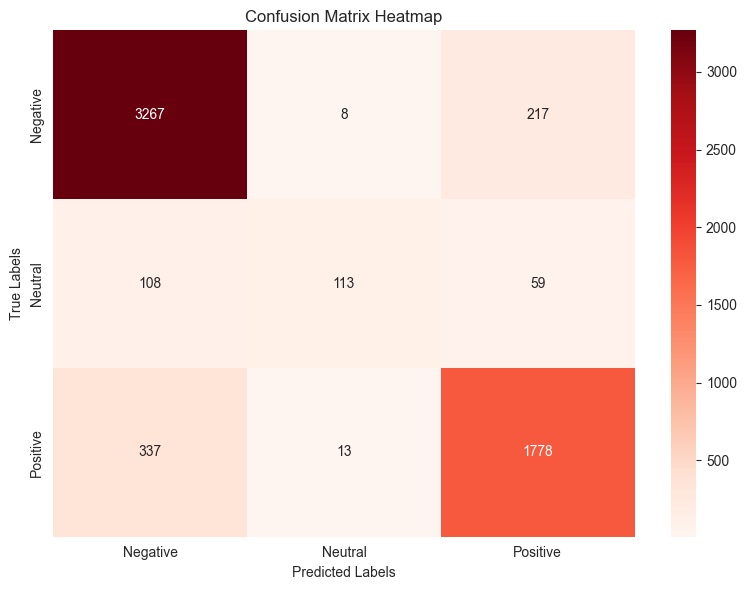

In [11]:
labels = sorted(y_test.unique())
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

#### Displaying the Classification Report of the Model

In [13]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    Negative       0.88      0.94      0.91      3492
     Neutral       0.84      0.40      0.55       280
    Positive       0.87      0.84      0.85      2128

    accuracy                           0.87      5900
   macro avg       0.86      0.72      0.77      5900
weighted avg       0.87      0.87      0.87      5900



#### Testing the Statments

In [14]:
sample_text = "I am really pissed off"
model.predict([sample_text])[0]

'Negative'

In [15]:
sample_text = "I am happy"
model.predict([sample_text])[0]

'Positive'